In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import LabelEncoder

In [2]:
testdata = pd.read_csv("testFeatGen.csv", encoding="utf8",low_memory = False)
validationdata = pd.read_csv("validationFeatGen.csv", encoding="utf8",low_memory = False)
traindata = pd.read_csv("trainFeatGen.csv", encoding="utf8",low_memory = False)

In [3]:
testdata['streamID'] = testdata.index + 1

In [4]:
test_df_iforest = pd.read_csv("test_df_iforest.csv", encoding="utf8",low_memory = False)
valid_df_iforest = pd.read_csv("valid_df_iforest.csv", encoding="utf8",low_memory = False)
train_t_df_iforest = pd.read_csv("train_t_df_iforest.csv", encoding="utf8",low_memory = False)
train_v_df_iforest = pd.read_csv("train_v_df_iforest.csv", encoding="utf8",low_memory = False)

iForest

In [5]:
from sklearn.ensemble import IsolationForest

Contamination 0.01

Test

In [6]:
%%time
iForest_t_1 = IsolationForest(contamination = .01)
iForest_t_1.fit(train_t_df_iforest)

Wall time: 9min 6s


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [7]:
%%time
labels_t = iForest_t_1.predict(test_df_iforest)

Wall time: 27.8 s


In [8]:
testresult_t_1 = copy.deepcopy(testdata)

In [9]:
testresult_t_1["iForest"] = pd.Series(labels_t)
testresult_t_1["iForest"] = testresult_t_1["iForest"].map({1: 0, -1: 1})
print(testresult_t_1["iForest"].value_counts())

0    1049082
1       4763
Name: iForest, dtype: int64


In [10]:
testresult_t_1plot = testresult_t_1[testresult_t_1.iForest==1]

<AxesSubplot:ylabel='src_ip'>

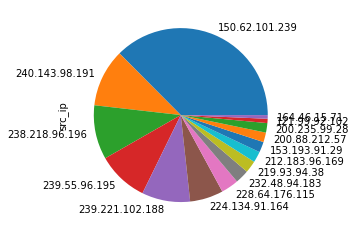

In [11]:
testresult_t_1plot.src_ip.value_counts()[:15].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

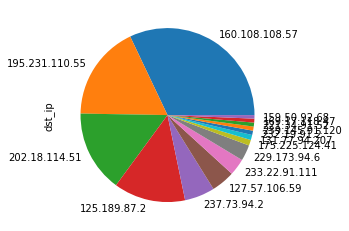

In [12]:
testresult_t_1plot.dst_ip.value_counts()[:15].plot.pie()

In [13]:
from sklearn.decomposition import IncrementalPCA
ipca_img = IncrementalPCA(n_components = 2, whiten = True, batch_size = 10)
ipca_img.fit(train_t_df_iforest)

IncrementalPCA(batch_size=10, copy=True, n_components=2, whiten=True)

In [14]:
reduced_test_data_iforest = ipca_img.transform(test_df_iforest)

In [15]:
iforest_plot_df = testresult_t_1[['iForest']]

In [16]:
iforest_plot_df['x'] = reduced_test_data_iforest[:, 0]
iforest_plot_df['y'] = reduced_test_data_iforest[:, 1]

C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
import seaborn as sns

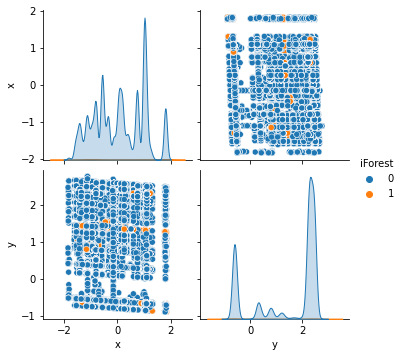

In [18]:
plot_if_001_allfeat = sns.pairplot(iforest_plot_df, hue = 'iForest')

In [19]:
plot_if_001_allfeat

In [20]:
plot_if_001_allfeat.savefig('plot_if_001_allfeat.png')

In [21]:
testresult_t_1plot.to_csv('test_result_iforest_001_allfeat.csv',index=False)

IPCA

In [22]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components = 5, whiten = True, batch_size = 10)
ipca.fit(train_t_df_iforest)

IncrementalPCA(batch_size=10, copy=True, n_components=5, whiten=True)

In [23]:
train_t_df_iforest_ipca = ipca.transform(train_t_df_iforest)
test_df_iforest_ipca = ipca.transform(test_df_iforest)

Test

In [24]:
%%time
iForest_t_2 = IsolationForest(contamination = .01)
iForest_t_2.fit(train_t_df_iforest_ipca)

Wall time: 8min 3s


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [25]:
%%time
labels_t_2 = iForest_t_2.predict(test_df_iforest_ipca)

Wall time: 24.7 s


In [26]:
testresult_t_2 = copy.deepcopy(testdata)

In [27]:
testresult_t_2["iForest"] = pd.Series(labels_t_2)
testresult_t_2["iForest"] = testresult_t_2["iForest"].map({1: 0, -1: 1})
print(testresult_t_2["iForest"].value_counts())

0    1026671
1      27174
Name: iForest, dtype: int64


In [28]:
testresult_t_2plot = testresult_t_2[testresult_t_2.iForest==1]

<AxesSubplot:ylabel='src_ip'>

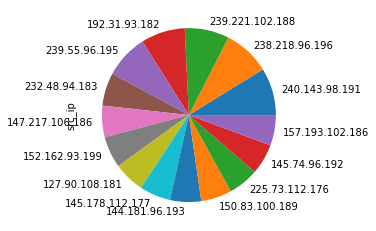

In [29]:
testresult_t_2plot.src_ip.value_counts()[:15].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

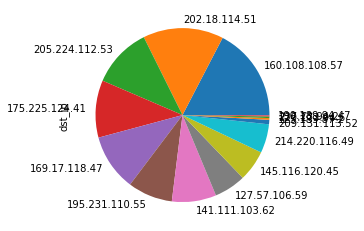

In [30]:
testresult_t_2plot.dst_ip.value_counts()[:15].plot.pie()

In [31]:
iforest_plot_df_ipca = testresult_t_2[['iForest']]

In [32]:
iforest_plot_df_ipca['pc1'] = test_df_iforest_ipca[:, 0]
iforest_plot_df_ipca['pc2'] = test_df_iforest_ipca[:, 1]
iforest_plot_df_ipca['pc3'] = test_df_iforest_ipca[:, 2]
iforest_plot_df_ipca['pc4'] = test_df_iforest_ipca[:, 3]
iforest_plot_df_ipca['pc5'] = test_df_iforest_ipca[:, 4]

C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [33]:
import seaborn as sns

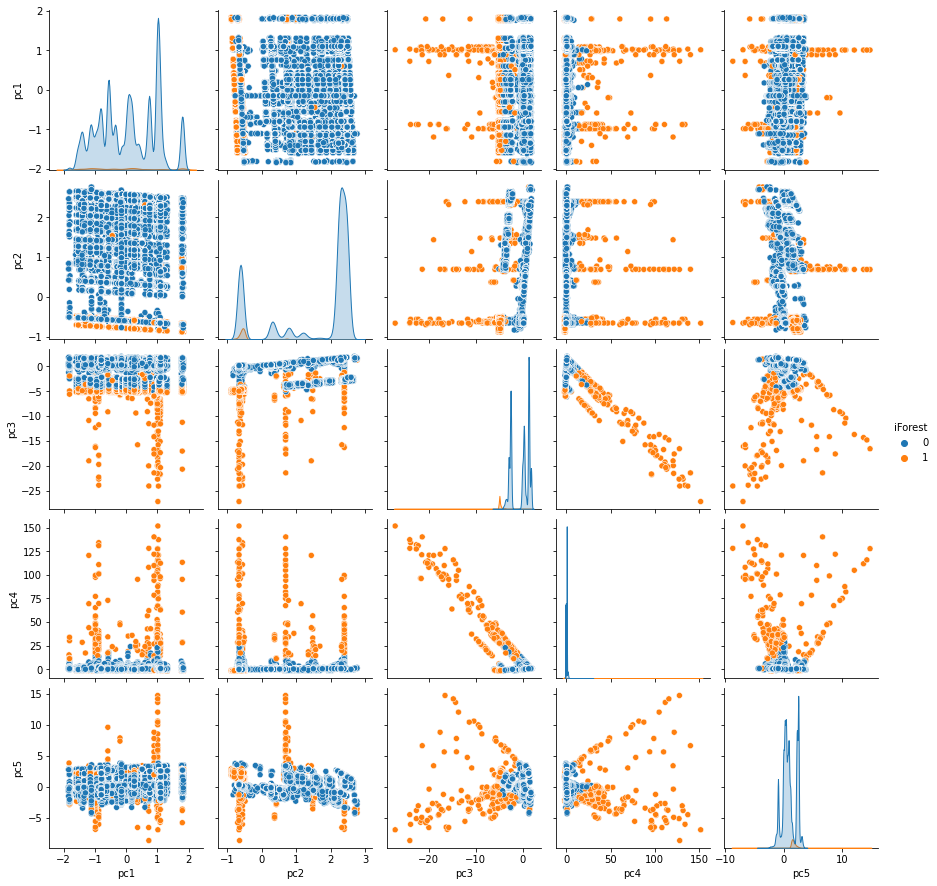

In [34]:
plot_if_001_ipca = sns.pairplot(iforest_plot_df_ipca, hue = 'iForest')

In [35]:
plot_if_001_ipca

In [36]:
plot_if_001_ipca.savefig('plot_if_001_ipca.png')

In [37]:
testresult_t_2plot.to_csv('test_result_iforest_001_ipca.csv',index=False)

Variance threshold

In [38]:
from sklearn.feature_selection import VarianceThreshold

In [39]:
threshold = VarianceThreshold(threshold = .95)
train_t_df_iforest_var = threshold.fit_transform(train_t_df_iforest)

In [40]:
threshold.variances_

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 4.32341755e+00, 1.15857721e+04, 3.67954642e-01,
       1.64749614e+00, 3.18676517e+12])

In [41]:
train_t_df_iforest

,pps,bps_oneway,bpp_oneway,bps_twoway,bpp_twoway,protocol,state,src_type_service,dst_type_service,flowID
0,-0.296304,-0.141070,-0.198099,-0.308510,-0.333346,11,120,0,0,3172235
1,-0.296311,-0.141075,-0.381005,-0.308519,-0.765294,11,328,0,4,3172260
2,-0.296311,-0.141075,-0.296964,-0.308519,-0.713803,11,328,0,4,3172243
3,-0.296311,-0.141075,-0.308253,-0.308519,-0.706673,11,328,0,4,3172252
4,-0.296311,-0.141075,-0.067419,-0.308519,-0.583095,11,328,0,4,3172238
...,...,...,...,...,...,...,...,...,...,...
13882030,-0.296310,-0.141074,-0.200504,-0.308518,-0.483705,11,190,0,0,947367
13882031,-0.296310,-0.141074,-0.204271,-0.308518,-0.483427,11,190,0,0,947367
13882032,-0.296310,-0.141074,-0.249381,-0.308518,-0.492166,11,190,0,0,947367
13882033,-0.296310,-0.141074,-0.163144,-0.308518,-0.459356,11,190,0,0,947367


In [42]:
train_t_df_iforest_var = train_t_df_iforest.loc[:, threshold.get_support()]

In [43]:
train_t_df_iforest_var = train_t_df_iforest.drop(['src_type_service','dst_type_service'], 1)
train_v_df_iforest_var = train_v_df_iforest.drop(['src_type_service','dst_type_service'], 1)
test_df_iforest_var = test_df_iforest.drop(['src_type_service','dst_type_service'], 1)
valid_df_iforest_var = valid_df_iforest.drop(['src_type_service','dst_type_service'], 1)

Test

In [44]:
%%time
iForest_t_3 = IsolationForest(contamination = .01)
iForest_t_3.fit(train_t_df_iforest_var)

Wall time: 8min 36s


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [45]:
%%time
labels_t_3 = iForest_t_3.predict(test_df_iforest_var)

Wall time: 26.3 s


In [46]:
testresult_t_3 = copy.deepcopy(testdata)

In [47]:
testresult_t_3["iForest"] = pd.Series(labels_t_3)
testresult_t_3["iForest"] = testresult_t_3["iForest"].map({1: 0, -1: 1})
print(testresult_t_3["iForest"].value_counts())

0    1042798
1      11047
Name: iForest, dtype: int64


In [48]:
testresult_t_3plot = testresult_t_3[testresult_t_3.iForest==1]

<AxesSubplot:ylabel='src_ip'>

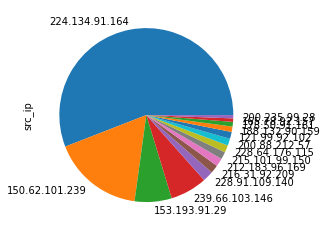

In [49]:
testresult_t_3plot.src_ip.value_counts()[:15].plot.pie()

<AxesSubplot:ylabel='dst_ip'>

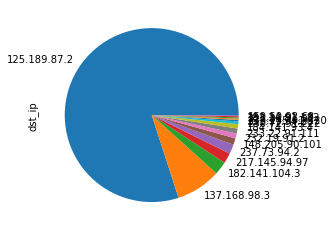

In [50]:
testresult_t_3plot.dst_ip.value_counts()[:15].plot.pie()

In [51]:
from sklearn.decomposition import IncrementalPCA
ipca_img_var = IncrementalPCA(n_components = 2, whiten = True, batch_size = 10)
ipca_img_var.fit(train_t_df_iforest_var)

IncrementalPCA(batch_size=10, copy=True, n_components=2, whiten=True)

In [52]:
reduced_test_data_iforest_var = ipca_img_var.transform(test_df_iforest_var)

In [53]:
iforest_plot_df_var = testresult_t_3[['iForest']]

In [54]:
iforest_plot_df_var['x'] = reduced_test_data_iforest_var[:, 0]
iforest_plot_df_var['y'] = reduced_test_data_iforest_var[:, 1]

C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
import seaborn as sns

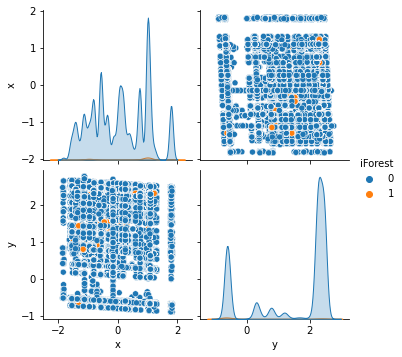

In [56]:
plot_if_001_var = sns.pairplot(iforest_plot_df_var, hue = 'iForest')

In [57]:
plot_if_001_var

In [58]:
plot_if_001_var.savefig('plot_if_001_var.png')

In [59]:
testresult_t_3plot.to_csv('test_result_iforest_001_var.csv',index=False)